In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import scipy.io
import torch.nn as nn
import torch
import numpy as np
from sklearn.model_selection import GroupKFold,LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.base import TransformerMixin,BaseEstimator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from glob import glob
import scipy.io
import torch.nn as nn
import torch
import numpy as np

data_array = np.load('/content/drive/MyDrive/GP-Data/data_array.npy')
label_array = np.load('/content/drive/MyDrive/GP-Data/label_array.npy')
group_array = np.load('/content/drive/MyDrive/GP-Data/group_array.npy')

print(data_array.shape,label_array.shape,group_array.shape)

(7150, 1250, 33) (7150,) (7150,)


In [ ]:
gkf=GroupKFold()
class StandardScaler3D(BaseEstimator,TransformerMixin):
    #batch, sequence, channels
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self,X,y=None):
        self.scaler.fit(X.reshape(-1, X.shape[2]))
        return self

    def transform(self,X):
        return self.scaler.transform(X.reshape( -1,X.shape[2])).reshape(X.shape)


def three_splits(data_array , label_array, group_array):

  # Split data_array into train and validate
  train_groups = []
  for train_index, test_index in gkf.split(data_array, label_array, groups=group_array):
      train_features, train_label = data_array[train_index],label_array[train_index]
      X_test, y_test =data_array[test_index],label_array[test_index]
      train_groups = group_array[train_index]

      scaler=StandardScaler3D()
      train_features=scaler.fit_transform(train_features)
      X_test=scaler.transform(X_test)

      print(f"group={np.unique(group_array[train_index])}")
      print(f"group={np.unique(group_array[test_index])}")
      break

  # Split train_features into train and val
  for train_index, val_index in gkf.split(train_features, train_label, groups= train_groups):
      X_train, y_train =train_features[train_index],train_label[train_index]
      X_val, y_val =train_features[val_index],train_label[val_index]

      print(f"group={np.unique(group_array[train_index])}")
      print(f"group={np.unique(group_array[val_index])}")

      break

  return X_train, X_val, X_test, y_train, y_val, y_test




def two_splits(data_array , label_array, group_array):

  # Split data_array into train and validate
  train_groups = []
  for train_index, test_index in gkf.split(data_array, label_array, groups=group_array):
      X_train, y_train = data_array[train_index],label_array[train_index]
      X_test, y_test =data_array[test_index],label_array[test_index]
      train_groups = group_array[train_index]

      scaler=StandardScaler3D()
      X_train=scaler.fit_transform(X_train)
      X_test=scaler.transform(X_test)

      print(f"group={np.unique(group_array[train_index])}")
      print(f"group={np.unique(group_array[test_index])}")
      break

  return X_train, X_test, y_train, y_test


# X_train, X_val, X_test, y_train, y_val, y_test = three_splits(data_array , label_array, group_array)

X_train, X_test, y_train, y_test = two_splits(data_array , label_array, group_array)

# convert the problem from multiclass classification to binary classification
# make haemorrhage and schaemia classes as one

y_train[y_train==0] = 1
y_train[y_train==2] = 0

# y_val[y_val==0] = 1
# y_val[y_val==2] = 0

y_test[y_test==0] = 1
y_test[y_test==2] = 0

group=[ 0  1  2  3  4  5  6  7  8 10 11 12 13 15 16 18 19 20 22 23 25 27 28 29
 30 31 34 36 37 38 39 40 41 42 43 44 45 46 47]
group=[ 9 14 17 21 24 26 32 33 35]


In [ ]:
# Flatten the data array for ML models
X_train = X_train.reshape(X_train.shape[0], -1)
# X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
y_train = y_train.reshape(y_train.shape[0], -1)
# y_val = y_val.reshape(y_val.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0], -1)

# **XGBoost, Trail and Errors**

Accuracy: 0.5849602313810557
Recall: 0.5849602313810557
Precision: 0.6548579932401756
F1-score: 0.5997282366495469
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.40      0.64      0.49       435
           1       0.77      0.56      0.65       948

    accuracy                           0.58      1383
   macro avg       0.59      0.60      0.57      1383
weighted avg       0.65      0.58      0.60      1383



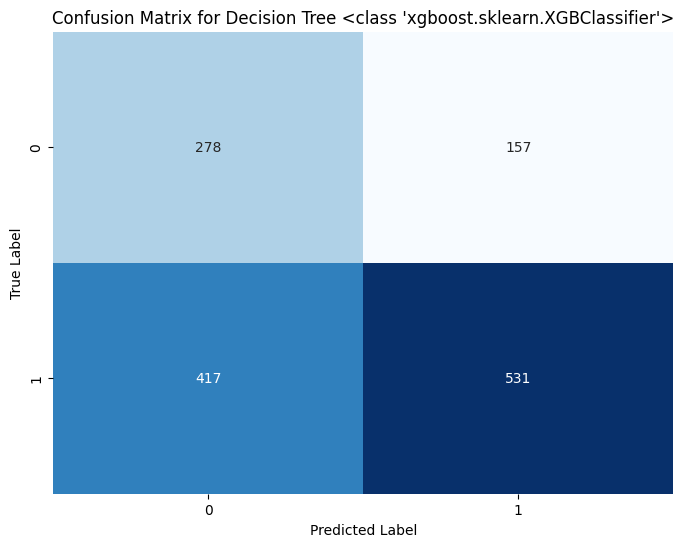

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Train a Decision Tree Classifier
xgb_classifier = XGBClassifier(
    max_depth=3,
    n_estimators=50,
    learning_rate=0.01
)
model=fit_and_evaluate(X_train, y_train,X_test , y_test,xgb_classifier)


In [ ]:
import joblib

# Specify the full path including the filename and .joblib extension
model_path = '/content/drive/MyDrive/GP-Trail/XGBoostWithHayperParameter_T1.joblib'

# Save your model
joblib.dump(model, model_path)

['/content/drive/MyDrive/GP-Trail/XGBoostWithHayperParameter_T1.joblib']

Accuracy: 0.6854663774403471
Recall: 0.6854663774403471
Precision: 0.46986415460119235
F1-score: 0.5575479414958807
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       435
           1       0.69      1.00      0.81       948

    accuracy                           0.69      1383
   macro avg       0.34      0.50      0.41      1383
weighted avg       0.47      0.69      0.56      1383



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

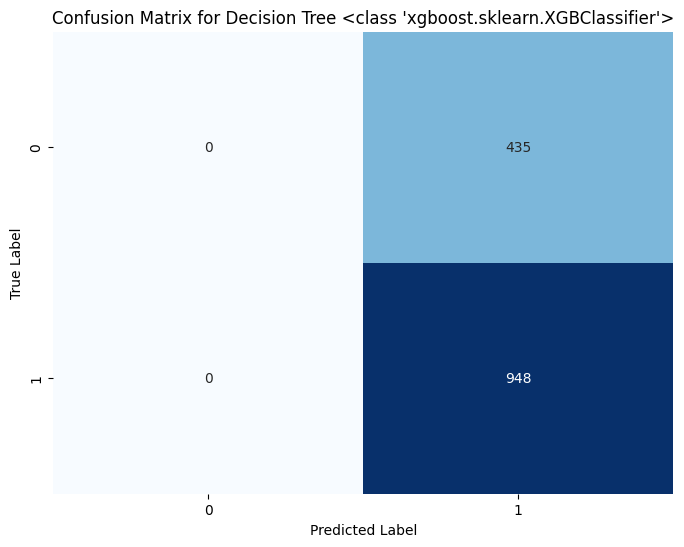

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Train a Decision Tree Classifier
xgb_classifier = XGBClassifier(
    max_depth=5,
    n_estimators=100,
    learning_rate=0.001
)
model=fit_and_evaluate(X_train, y_train,X_test , y_test,xgb_classifier)


In [ ]:
import joblib

# Specify the full path including the filename and .joblib extension
model_path = '/content/drive/MyDrive/GP-Trail/XGBoostWithHayperParameter_T2.joblib'

# Save your model
joblib.dump(model, model_path)

['/content/drive/MyDrive/GP-Trail/XGBoostWithHayperParameter_T2.joblib']

Accuracy: 0.48300795372378885
Recall: 0.48300795372378885
Precision: 0.5209710145965484
F1-score: 0.49791473956826043
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.25      0.33      0.29       435
           1       0.64      0.55      0.59       948

    accuracy                           0.48      1383
   macro avg       0.45      0.44      0.44      1383
weighted avg       0.52      0.48      0.50      1383



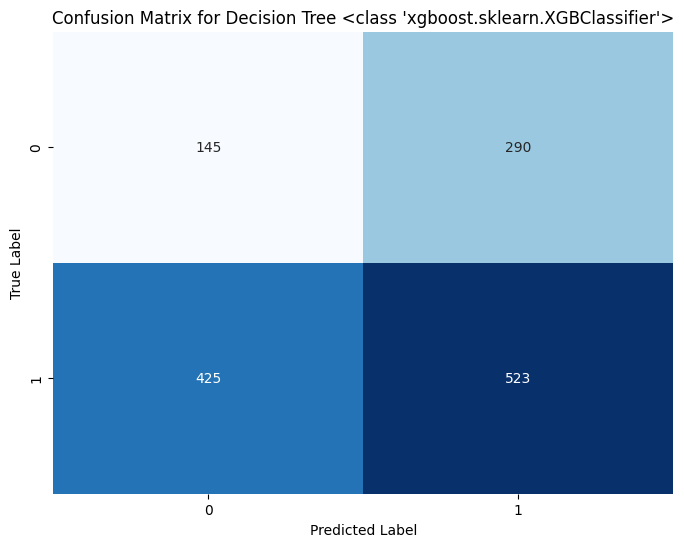

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Train a Decision Tree Classifier
xgb_classifier = XGBClassifier(
    max_depth=5,
    n_estimators=100,
    learning_rate=0.1
)
model=fit_and_evaluate(X_train, y_train,X_test , y_test,xgb_classifier)


In [ ]:
import joblib

# Specify the full path including the filename and .joblib extension
model_path = '/content/drive/MyDrive/GP-Trail/XGBoostWithHayperParameter_T3.joblib'

# Save your model
joblib.dump(model, model_path)

['/content/drive/MyDrive/GP-Trail/XGBoostWithHayperParameter_T3.joblib']

Accuracy: 0.7845263919016631
Recall: 0.7845263919016631
Precision: 0.7862095014404701
F1-score: 0.7853059770776329
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.65      0.67      0.66       435
           1       0.85      0.84      0.84       948

    accuracy                           0.78      1383
   macro avg       0.75      0.75      0.75      1383
weighted avg       0.79      0.78      0.79      1383



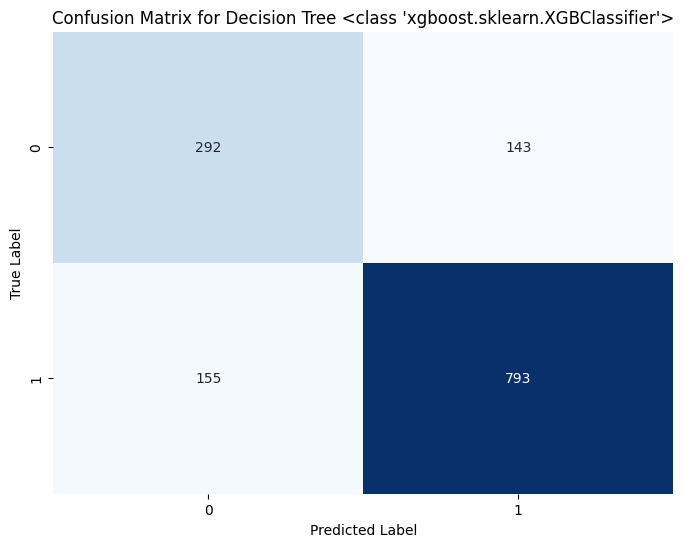

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Train a Decision Tree Classifier
xgb_classifier = XGBClassifier(
    max_depth=7,
    n_estimators=200,
    learning_rate=0.01
)
model=fit_and_evaluate(X_train, y_train,X_test , y_test,xgb_classifier)


In [ ]:
import joblib

# Specify the full path including the filename and .joblib extension
model_path = '/content/drive/MyDrive/GP-Trail/XGBoostWithHayperParameter_T4.joblib'

# Save your model
joblib.dump(model, model_path)

['/content/drive/MyDrive/GP-Trail/XGBoostWithHayperParameter_T4.joblib']

Accuracy: 0.7816341287057122
Recall: 0.7816341287057122
Precision: 0.7830434669408776
F1-score: 0.7822959311812558
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.65      0.66      0.66       435
           1       0.84      0.84      0.84       948

    accuracy                           0.78      1383
   macro avg       0.75      0.75      0.75      1383
weighted avg       0.78      0.78      0.78      1383



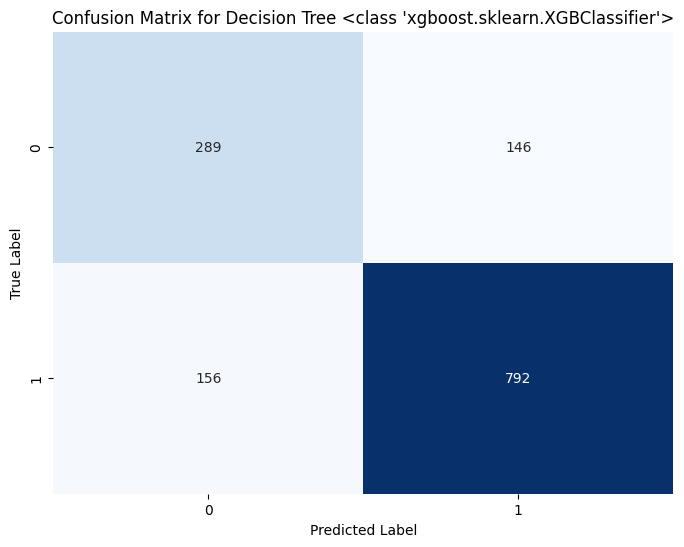

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Train a Decision Tree Classifier
xgb_classifier = XGBClassifier(
    max_depth=9,
    n_estimators=300,
    learning_rate=0.01
)
model=fit_and_evaluate(X_train, y_train,X_test , y_test,xgb_classifier)


In [ ]:
import joblib

# Specify the full path including the filename and .joblib extension
model_path = '/content/drive/MyDrive/GP-Trail/XGBoostWithHayperParameter_T5.joblib'

# Save your model
joblib.dump(model, model_path)

['/content/drive/MyDrive/GP-Trail/XGBoostWithHayperParameter_T5.joblib']

Accuracy: 0.7845263919016631
Recall: 0.7845263919016631
Precision: 0.7862095014404701
F1-score: 0.7853059770776329
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.65      0.67      0.66       435
           1       0.85      0.84      0.84       948

    accuracy                           0.78      1383
   macro avg       0.75      0.75      0.75      1383
weighted avg       0.79      0.78      0.79      1383



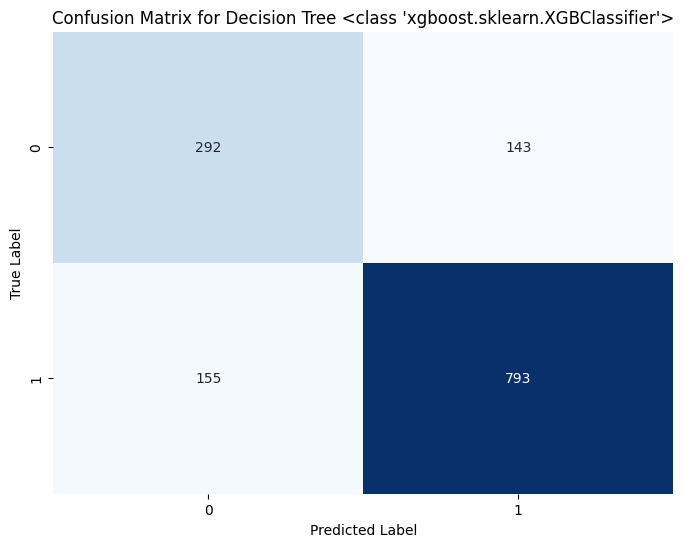

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Train a Decision Tree Classifier
xgb_classifier = XGBClassifier(
    max_depth=9,
    n_estimators=200,
    learning_rate=0.01
)
model=fit_and_evaluate(X_train, y_train,X_test , y_test,xgb_classifier)


In [ ]:
import joblib

# Specify the full path including the filename and .joblib extension
model_path = '/content/drive/MyDrive/GP-Trail/XGBoostWithHayperParameter_T6.joblib'

# Save your model
joblib.dump(model, model_path)

['/content/drive/MyDrive/GP-Trail/XGBoostWithHayperParameter_T6.joblib']

Accuracy: 0.7823571945047
Recall: 0.7823571945047
Precision: 0.7814349893015486
F1-score: 0.7818748069273593
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.66      0.65      0.65       435
           1       0.84      0.84      0.84       948

    accuracy                           0.78      1383
   macro avg       0.75      0.75      0.75      1383
weighted avg       0.78      0.78      0.78      1383



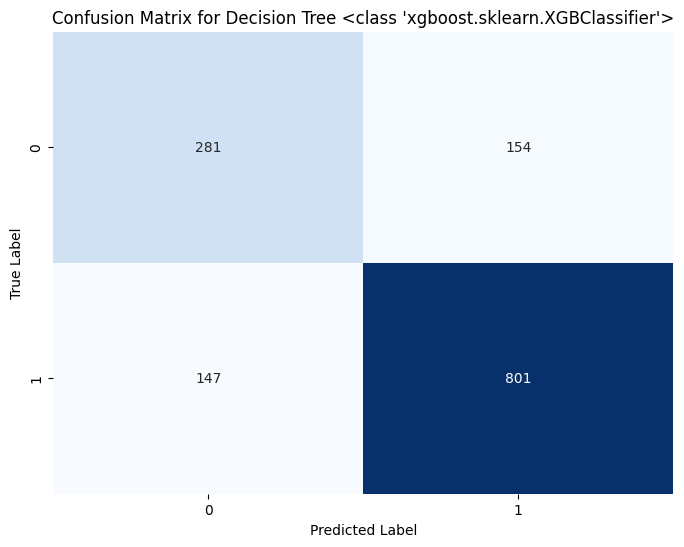

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Train a Decision Tree Classifier
xgb_classifier = XGBClassifier(
    max_depth=9,
    n_estimators=200,
    learning_rate=0.001
)
model=fit_and_evaluate(X_train, y_train,X_test , y_test,xgb_classifier)


In [ ]:
import joblib

# Specify the full path including the filename and .joblib extension
model_path = '/content/drive/MyDrive/GP-Trail/XGBoostWithHayperParameter_T7.joblib'

# Save your model
joblib.dump(model, model_path)

['/content/drive/MyDrive/GP-Trail/XGBoostWithHayperParameter_T7.joblib']